# show the image


In [3]:
import cv2
img = cv2.imread('iau.jpg')
cv2.imshow("input",img)
cv2.waitKey()

-1

# convert a color image in grayscale mode

In [5]:
gray_img = cv2.imread('iau.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Grayscale', gray_img)
cv2.waitKey()

-1

# To Save an image

In [ ]:
cv2.imwrite('iau.jpg', gray_img)

# Task 1

### a. Increase the size of the image

In [7]:
import cv2 as cv
img = cv.imread('iau.jpg')
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC) # double the scales of the image
cv.imshow('img', res)
print("before resize:",img.shape)
print("after resize:",res.shape)
cv.waitKey(0) # the function waits indefinitely until a key is pressed to show the image

before resize: (329, 878, 3)
after resize: (658, 1756, 3)


-1

### b. Image Rotation

In [11]:
import numpy as np
import cv2 as cv
img = cv.imread('iau.jpg')
rows, cols = img.shape[:2]
img_rotation = cv.warpAffine(img, cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))
"""
cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6):
(cols/2, rows/2):defines the center of rotation
30 : angle(30) is the rotation angle in degrees
0.6 : (scale factor) means the image is shrunk to of its original size

cv.warpAffine(img, cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows)):
img: Input image
cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6): The 2x3 floating-point transformation matrix
(cols, rows): Size of the output image

"""
cv.imshow('img', img_rotation)
cv.imwrite('rotation_out.jpg', img_rotation)
cv.waitKey(0)

-1

### c.1 Sheer operations in X-Axis

In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('iau.jpg')
rows, cols = img.shape[:2]
M = np.float32([[1, 0.5, 0],
                [0, 1, 0],
                [0, 0, 1]]) # x-coordinate will be shifted by 0.5 times its original y-coordinate value
sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5))) # resize the output to be 1.5 times the original to ensure the entire sheared image is visible
cv.imshow('img', sheared_img)
cv.waitKey(0)

-1

### c.2 Image Shearing in Y-Axis

In [15]:
import numpy as np
import cv2 as cv
img = cv.imread('iau.jpg')
rows, cols = img.shape[:2]
M = np.float32([[1,   0, 0],
                [0.5, 1, 0],
                [0,   0, 1]]) # Y-axis shear transformation where the Y-coordinate is shifted by 0.5 times the X-coordinate
sheared_img = cv.warpPerspective(img, M, (int(cols*2), int(rows*2))) # resize the output to be 2 times the original to ensure the entire sheared image is visible
cv.imshow('sheared_y-axis_out.jpg', sheared_img)
cv.waitKey(0)

-1

# Task 2

### 1.	Negative

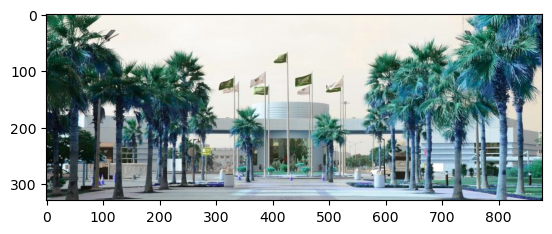

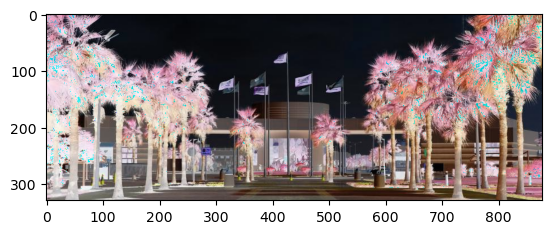

In [17]:
import cv2
import matplotlib.pyplot as plt
img_bgr = cv2.imread('iau.jpg', 1) # 1 means cv2.IMREAD_COLOR Loads the image as a 3-channel color image
plt.imshow(img_bgr)
plt.show()
# Negate the original image
img_neg = 1 - img_bgr
plt.imshow(img_neg)
plt.show()

### 2.	Log with

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_23804\4020718317.py:9: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_23804\4020718317.py:12: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


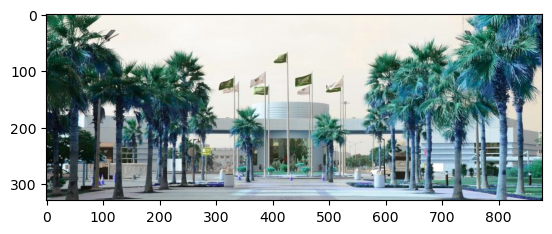

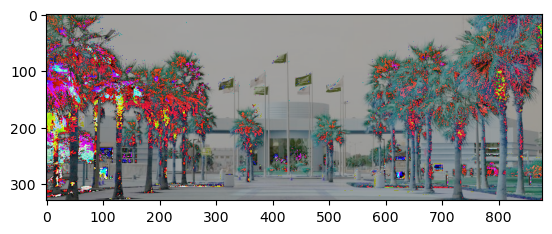

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('iau.jpg')

# Apply log transformation method
c = 255 / np.log(1 + 28)
log_image = c * (np.log(image + 1))

# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)

plt.imshow(image)
plt.show()

plt.imshow(log_image)
plt.show()

### 3.	Power law

In [19]:
import cv2
import numpy as np

img = cv2.imread('iau.jpg')

# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)